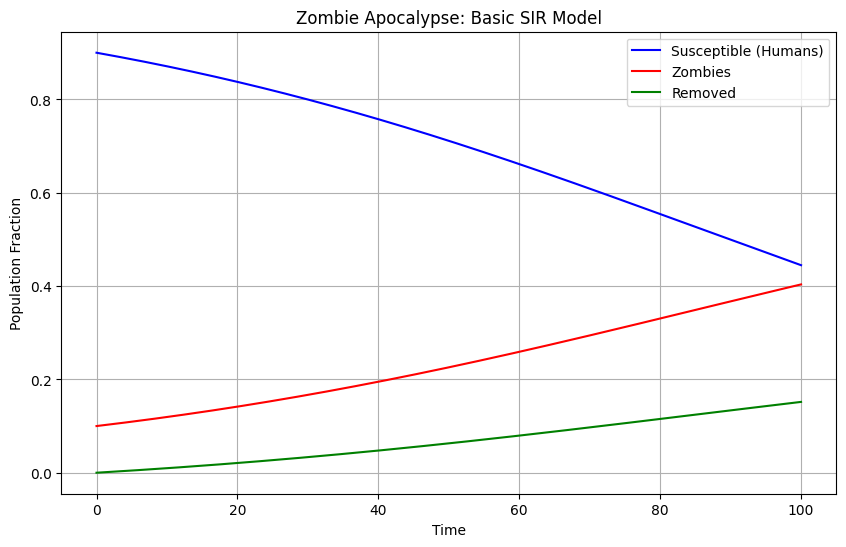

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义 SIR 模型的微分方程
def sir_model(y, t, beta, alpha):
    S, Z, R = y  # S: 易感者, Z: 僵尸, R: 被移除者
    dS_dt = -beta * S * Z  # 易感者被僵尸感染
    dZ_dt = beta * S * Z - alpha * S * Z  # 僵尸增加和被人类移除
    dR_dt = alpha * S * Z  # 移除者增加
    return [dS_dt, dZ_dt, dR_dt]

# 模型参数
beta = 0.03  # 感染率（僵尸感染人类的速率）
alpha = 0.01  # 移除率（人类消灭僵尸的速率）
S0 = 0.9  # 初始易感者比例
Z0 = 0.1  # 初始僵尸比例
R0 = 0.0  # 初始移除者比例

# 时间范围
t = np.linspace(0, 100, 1000)  # 从时间 t=0 到 t=100 分为 1000 个步长

# 初始条件
initial_conditions = [S0, Z0, R0]

# 使用 odeint 求解微分方程
solution = odeint(sir_model, initial_conditions, t, args=(beta, alpha))
S, Z, R = solution.T  # 分别获取 S, Z, R 的解

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptible (Humans)", color="blue")
plt.plot(t, Z, label="Zombies", color="red")
plt.plot(t, R, label="Removed", color="green")
plt.title("Zombie Apocalypse: Basic SIR Model")
plt.xlabel("Time")
plt.ylabel("Population Fraction")
plt.legend()
plt.grid()
plt.show()


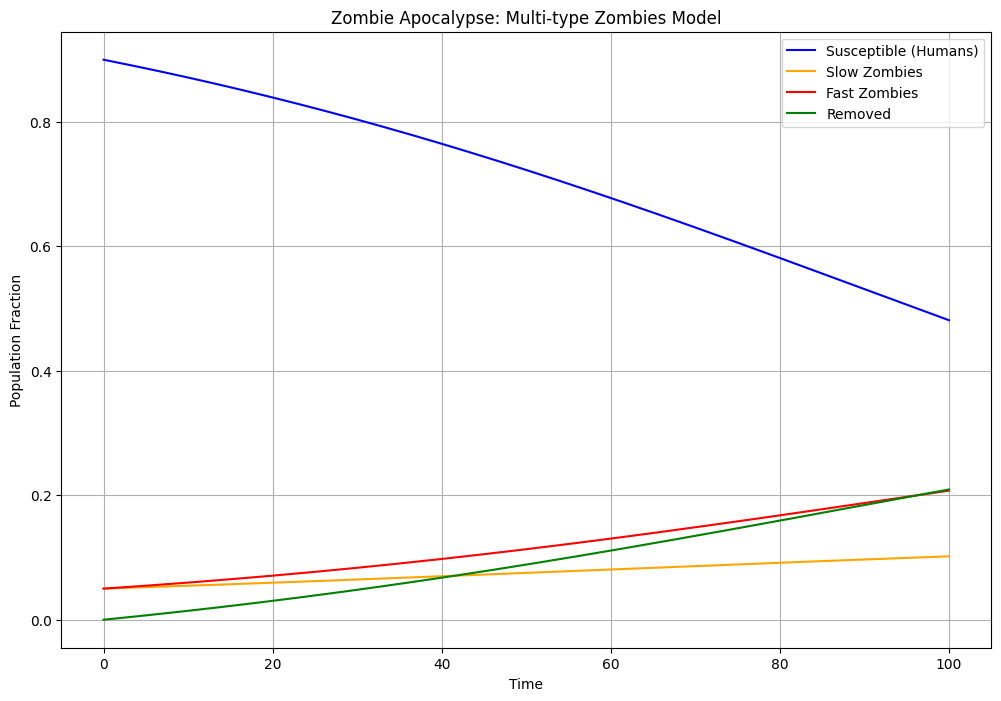

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 定义多类型僵尸的 MSIR 模型
def msir_model(y, t, beta_slow, beta_fast, alpha_slow, alpha_fast):
    S, Z_slow, Z_fast, R = y  # 易感者 (S), 慢僵尸 (Z_slow), 快僵尸 (Z_fast), 移除者 (R)

    # 微分方程
    dS_dt = -beta_slow * S * Z_slow - beta_fast * S * Z_fast  # 易感者被慢僵尸和快僵尸感染
    dZ_slow_dt = beta_slow * S * Z_slow - alpha_slow * S * Z_slow  # 慢僵尸传播和被移除
    dZ_fast_dt = beta_fast * S * Z_fast - alpha_fast * S * Z_fast  # 快僵尸传播和被移除
    dR_dt = alpha_slow * S * Z_slow + alpha_fast * S * Z_fast  # 移除者数量增加

    return [dS_dt, dZ_slow_dt, dZ_fast_dt, dR_dt]

# 模型参数
beta_slow = 0.02  # 慢僵尸感染率
beta_fast = 0.04  # 快僵尸感染率
alpha_slow = 0.01  # 慢僵尸移除率
alpha_fast = 0.02  # 快僵尸移除率

# 初始条件
S0 = 0.9  # 初始易感者比例
Z_slow0 = 0.05  # 初始慢僵尸比例
Z_fast0 = 0.05  # 初始快僵尸比例
R0 = 0.0  # 初始移除者比例
initial_conditions = [S0, Z_slow0, Z_fast0, R0]

# 时间范围
t = np.linspace(0, 100, 1000)  # 从时间 t=0 到 t=100 分为 1000 个步长

# 使用 odeint 求解微分方程
solution = odeint(msir_model, initial_conditions, t, args=(beta_slow, beta_fast, alpha_slow, alpha_fast))
S, Z_slow, Z_fast, R = solution.T  # 分别获取 S, Z_slow, Z_fast, R 的解

# 绘图
plt.figure(figsize=(12, 8))
plt.plot(t, S, label="Susceptible (Humans)", color="blue")
plt.plot(t, Z_slow, label="Slow Zombies", color="orange")
plt.plot(t, Z_fast, label="Fast Zombies", color="red")
plt.plot(t, R, label="Removed", color="green")
plt.title("Zombie Apocalypse: Multi-type Zombies Model")
plt.xlabel("Time")
plt.ylabel("Population Fraction")
plt.legend()
plt.grid()
plt.show()


Step 0: S=1719.2, Z_slow=84.48, Z_fast=200.16, R=6.16
Step 20: S=1268.544372593382, Z_slow=165.6199741887566, Z_fast=678.6886971229834, R=137.91339330564557
Step 40: S=1224.1812884636497, Z_slow=685.0560734680198, Z_fast=1188.434702452705, R=199.9127381102915
Step 60: S=1188.3973290197919, Z_slow=1254.4385816154188, Z_fast=1283.885835398124, R=396.7866546347194
Step 80: S=1191.2900956022568, Z_slow=1338.9369677107845, Z_fast=1286.4872233657127, R=648.9254966357337
Step 100: S=1198.9174867890426, Z_slow=1337.5825569250555, Z_fast=1286.5619979987496, R=872.9230341349748
Step 120: S=1206.1238043160079, Z_slow=1331.4603553636325, Z_fast=1286.56422683341, R=1065.3275263479723
Step 140: S=1212.776779376613, Z_slow=1325.319488179579, Z_fast=1286.5642935123767, R=1210.8286911640917
Step 160: S=1218.9729546024248, Z_slow=1319.0049476498718, Z_fast=1286.5642955080248, R=1272.0186503355412
Step 180: S=1224.7343003220299, Z_slow=1312.270713320516, Z_fast=1286.5642955677558, R=1284.2035982395805


C:\Users\10267\AppData\Local\Temp\ipykernel_30212\1258814026.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


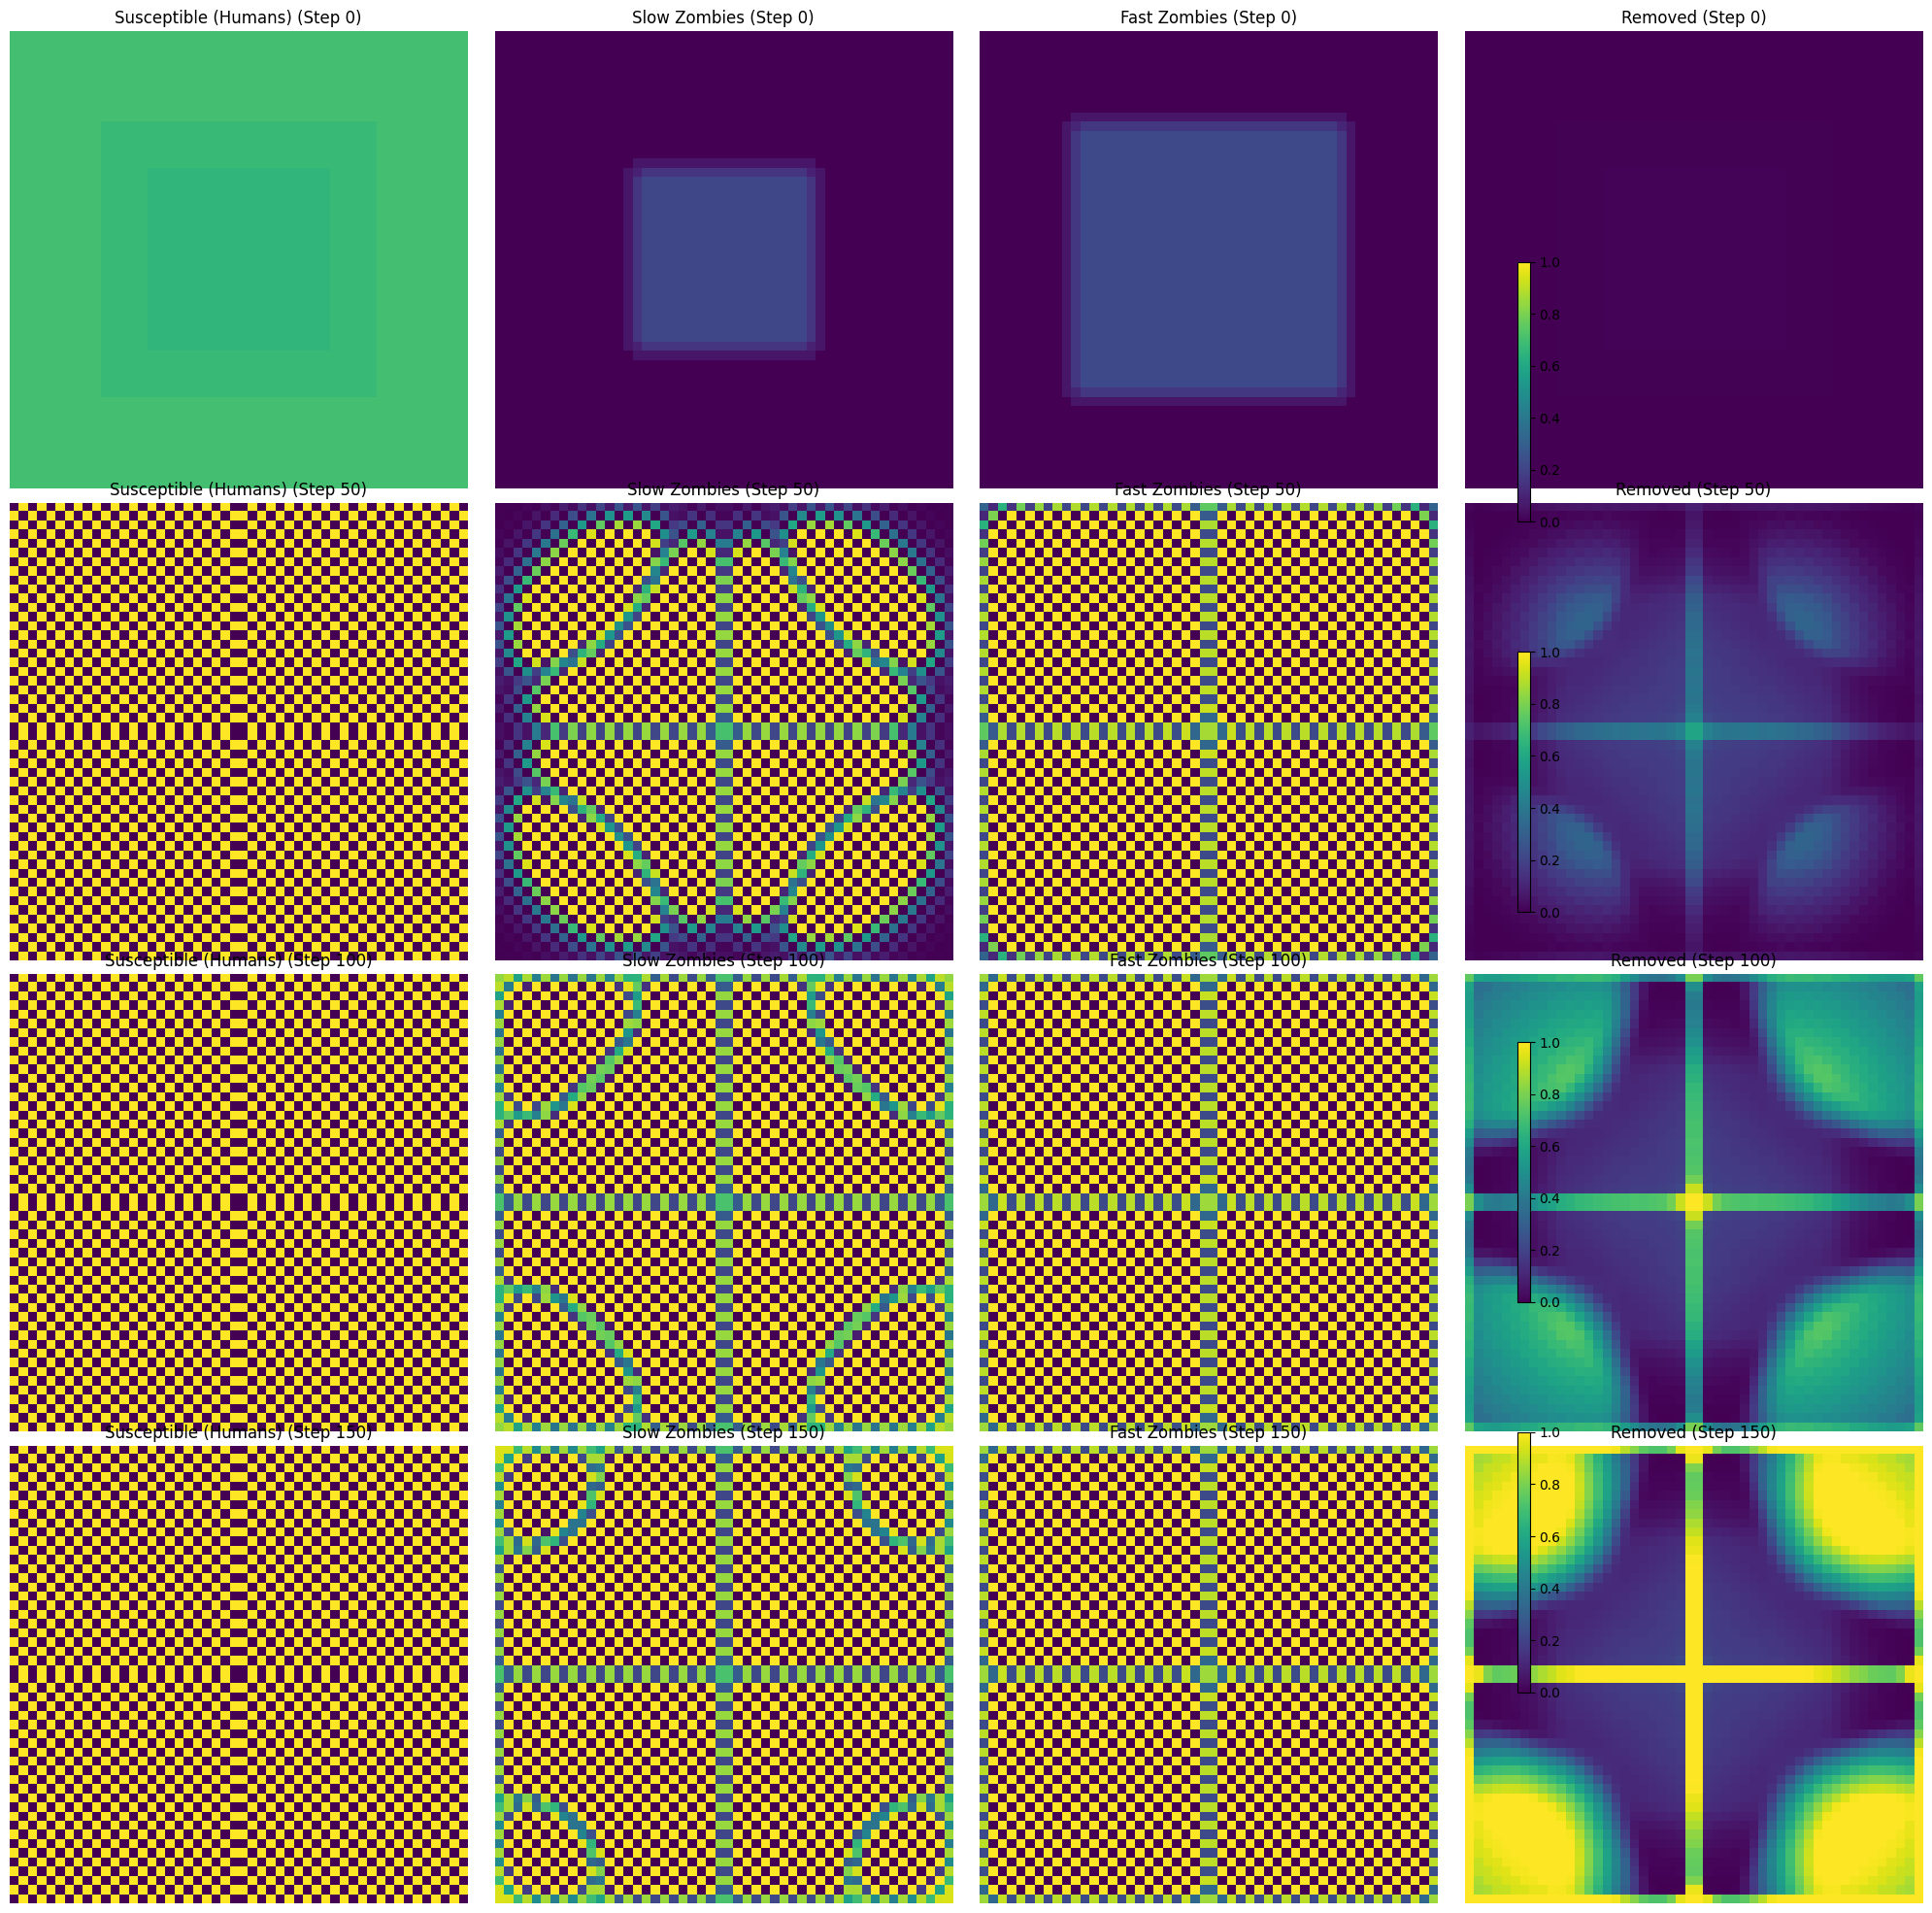

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 参数初始化
grid_size = 50
time_steps = 200
diffusion_rate_human = 0.5  # 增大扩散速率
diffusion_rate_zombie = 0.3
beta_slow = 0.1  # 增大感染率
beta_fast = 0.2
alpha_slow = 0.02
alpha_fast = 0.04

# 初始化网格
grid = np.zeros((grid_size, grid_size, 4))  # [S, Z_slow, Z_fast, R]
grid[:, :, 0] = 0.7  # 初始80%的易感者
grid[15:35, 15:35, 1] = 0.2  # 慢僵尸覆盖更大区域
grid[10:40, 10:40, 2] = 0.2  # 快僵尸覆盖更大区域

# 动态模拟函数
def simulate_spatial_model(grid, time_steps):
    results = []
    for t in range(time_steps):
        S, Z_slow, Z_fast, R = grid[:, :, 0], grid[:, :, 1], grid[:, :, 2], grid[:, :, 3]

        # 慢僵尸动态
        infection_slow = beta_slow * S * Z_slow
        removal_slow = alpha_slow * S * Z_slow
        diffusion_slow = diffusion_rate_zombie * (
            np.roll(Z_slow, 1, axis=0) + np.roll(Z_slow, -1, axis=0) +
            np.roll(Z_slow, 1, axis=1) + np.roll(Z_slow, -1, axis=1) - 4 * Z_slow
        )

        # 快僵尸动态
        infection_fast = beta_fast * S * Z_fast
        removal_fast = alpha_fast * S * Z_fast
        diffusion_fast = diffusion_rate_zombie * (
            np.roll(Z_fast, 1, axis=0) + np.roll(Z_fast, -1, axis=0) +
            np.roll(Z_fast, 1, axis=1) + np.roll(Z_fast, -1, axis=1) - 4 * Z_fast
        )

        # 人类动态
        diffusion_human = diffusion_rate_human * (
            np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
            np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S
        )

        # 动态更新
        dS = -infection_slow - infection_fast + diffusion_human
        dZ_slow = infection_slow - removal_slow + diffusion_slow
        dZ_fast = infection_fast - removal_fast + diffusion_fast
        dR = removal_slow + removal_fast

        # 更新网格
        grid[:, :, 0] += dS
        grid[:, :, 1] += dZ_slow
        grid[:, :, 2] += dZ_fast
        grid[:, :, 3] += dR

        # 确保数值范围有效
        grid = np.clip(grid, 0, 1)
        results.append(grid.copy())

        # 打印动态更新总数（可选）
        if t % 20 == 0:
            print(f"Step {t}: S={S.sum()}, Z_slow={Z_slow.sum()}, Z_fast={Z_fast.sum()}, R={R.sum()}")

    return results

# 静态绘图函数
def plot_static_frames(results, time_steps_to_plot):
    """
    绘制多个时间步长的静态网格图。
    :param results: 模拟结果 (3D 数组)
    :param time_steps_to_plot: 要绘制的时间步数组，例如 [0, 20, 50, 100]
    """
    fig, axes = plt.subplots(len(time_steps_to_plot), 4, figsize=(20, 5 * len(time_steps_to_plot)))
    titles = ["Susceptible (Humans)", "Slow Zombies", "Fast Zombies", "Removed"]

    for i, step in enumerate(time_steps_to_plot):
        data = results[step]
        for j in range(4):
            ax = axes[i, j] if len(time_steps_to_plot) > 1 else axes[j]
            im = ax.imshow(data[:, :, j], cmap="viridis", origin="lower", vmin=0, vmax=1)
            ax.set_title(f"{titles[j]} (Step {step})")
            ax.axis("off")
        fig.colorbar(im, ax=axes[i, :].ravel().tolist(), shrink=0.8)  # 添加颜色条
    
    plt.tight_layout()
    plt.show()

# 模拟运行
results = simulate_spatial_model(grid, time_steps)

# 绘制不同时刻的静态图
time_steps_to_plot = [0, 50, 100, 150]  # 选择要展示的时间步
plot_static_frames(results, time_steps_to_plot)



Step 0: S=1719.2, Z_slow=84.48, Z_fast=200.16, R=6.16
Step 20: S=1268.544372593382, Z_slow=165.6199741887566, Z_fast=678.6886971229834, R=137.91339330564557
Step 40: S=1224.1812884636497, Z_slow=685.0560734680198, Z_fast=1188.434702452705, R=199.9127381102915
Step 60: S=1188.3973290197919, Z_slow=1254.4385816154188, Z_fast=1283.885835398124, R=396.7866546347194
Step 80: S=1191.2900956022568, Z_slow=1338.9369677107845, Z_fast=1286.4872233657127, R=648.9254966357337
Step 100: S=1198.9174867890426, Z_slow=1337.5825569250555, Z_fast=1286.5619979987496, R=872.9230341349748
Step 120: S=1206.1238043160079, Z_slow=1331.4603553636325, Z_fast=1286.56422683341, R=1065.3275263479723
Step 140: S=1212.776779376613, Z_slow=1325.319488179579, Z_fast=1286.5642935123767, R=1210.8286911640917
Step 160: S=1218.9729546024248, Z_slow=1319.0049476498718, Z_fast=1286.5642955080248, R=1272.0186503355412
Step 180: S=1224.7343003220299, Z_slow=1312.270713320516, Z_fast=1286.5642955677558, R=1284.2035982395805


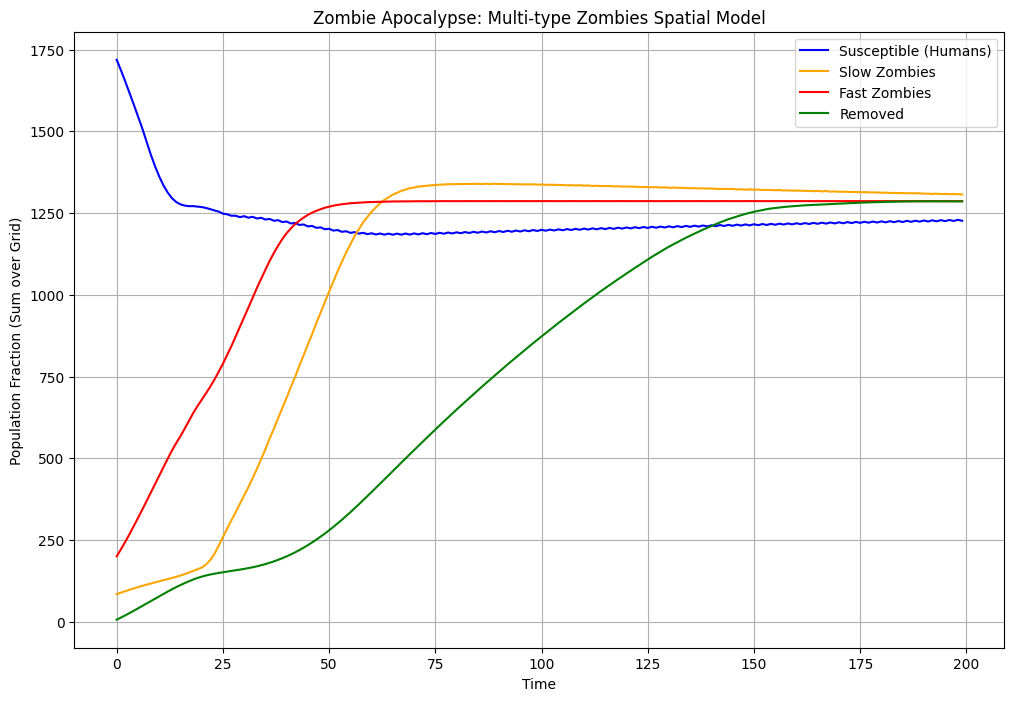

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 参数初始化
grid_size = 50
time_steps = 200
diffusion_rate_human = 0.5  # 增大扩散速率
diffusion_rate_zombie = 0.3
beta_slow = 0.1  # 增大感染率
beta_fast = 0.2
alpha_slow = 0.02
alpha_fast = 0.04

# 初始化网格
grid = np.zeros((grid_size, grid_size, 4))  # [S, Z_slow, Z_fast, R]
grid[:, :, 0] = 0.7  # 初始80%的易感者
grid[15:35, 15:35, 1] = 0.2  # 慢僵尸覆盖更大区域
grid[10:40, 10:40, 2] = 0.2  # 快僵尸覆盖更大区域

# 动态模拟函数
def simulate_spatial_model(grid, time_steps):
    results = []
    global_s, global_z_slow, global_z_fast, global_r = [], [], [], []
    for t in range(time_steps):
        S, Z_slow, Z_fast, R = grid[:, :, 0], grid[:, :, 1], grid[:, :, 2], grid[:, :, 3]

        # 慢僵尸动态
        infection_slow = beta_slow * S * Z_slow
        removal_slow = alpha_slow * S * Z_slow
        diffusion_slow = diffusion_rate_zombie * (
            np.roll(Z_slow, 1, axis=0) + np.roll(Z_slow, -1, axis=0) +
            np.roll(Z_slow, 1, axis=1) + np.roll(Z_slow, -1, axis=1) - 4 * Z_slow
        )

        # 快僵尸动态
        infection_fast = beta_fast * S * Z_fast
        removal_fast = alpha_fast * S * Z_fast
        diffusion_fast = diffusion_rate_zombie * (
            np.roll(Z_fast, 1, axis=0) + np.roll(Z_fast, -1, axis=0) +
            np.roll(Z_fast, 1, axis=1) + np.roll(Z_fast, -1, axis=1) - 4 * Z_fast
        )

        # 人类动态
        diffusion_human = diffusion_rate_human * (
            np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
            np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S
        )

        # 动态更新
        dS = -infection_slow - infection_fast + diffusion_human
        dZ_slow = infection_slow - removal_slow + diffusion_slow
        dZ_fast = infection_fast - removal_fast + diffusion_fast
        dR = removal_slow + removal_fast

        # 更新网格
        grid[:, :, 0] += dS
        grid[:, :, 1] += dZ_slow
        grid[:, :, 2] += dZ_fast
        grid[:, :, 3] += dR

        # 确保数值范围有效
        grid = np.clip(grid, 0, 1)
        results.append(grid.copy())

        # 记录全局总量
        global_s.append(S.sum())
        global_z_slow.append(Z_slow.sum())
        global_z_fast.append(Z_fast.sum())
        global_r.append(R.sum())

        # 打印动态更新总数（可选）
        if t % 20 == 0:
            print(f"Step {t}: S={S.sum()}, Z_slow={Z_slow.sum()}, Z_fast={Z_fast.sum()}, R={R.sum()}")

    return results, global_s, global_z_slow, global_z_fast, global_r

# 模拟运行
results, global_s, global_z_slow, global_z_fast, global_r = simulate_spatial_model(grid, time_steps)

# 时间演化图
t = np.arange(time_steps)
plt.figure(figsize=(12, 8))
plt.plot(t, global_s, label="Susceptible (Humans)", color="blue")
plt.plot(t, global_z_slow, label="Slow Zombies", color="orange")
plt.plot(t, global_z_fast, label="Fast Zombies", color="red")
plt.plot(t, global_r, label="Removed", color="green")
plt.title("Zombie Apocalypse: Multi-type Zombies Spatial Model")
plt.xlabel("Time")
plt.ylabel("Population Fraction (Sum over Grid)")
plt.legend()
plt.grid()
plt.show()


Step 0: S=1719.2, Z_slow=84.48, Z_fast=200.16, R=6.16
Step 20: S=988.7063609803286, Z_slow=766.7526841066008, Z_fast=1243.3163417502892, R=350.1592591783501
Step 40: S=823.0688289332066, Z_slow=2047.5139269676279, Z_fast=2583.931195220296, R=1296.4716184834879
Step 60: S=872.1879981105665, Z_slow=2366.1932607793783, Z_fast=2611.404322293207, R=2317.189819151508
Step 80: S=1064.1859733281713, Z_slow=2353.7797811844957, Z_fast=2581.237011771318, R=2549.4390294728105
Step 100: S=1029.2292308071685, Z_slow=1309.3116564197367, Z_fast=2507.143831018935, R=2544.4952558362975
Step 120: S=1250.2938777378974, Z_slow=1252.2048073027402, Z_fast=1252.8955914745147, R=2500.231255789604
Step 140: S=895.0421159148899, Z_slow=1773.6721101944008, Z_fast=2304.325337037578, R=2550.6792902007146
Step 160: S=867.2460407679255, Z_slow=2555.1959958831358, Z_fast=2611.331170143378, R=2566.0065204420534
Step 180: S=1055.028566979739, Z_slow=2540.281145899464, Z_fast=2581.219870781899, R=2575.1123148502


C:\Users\10267\AppData\Local\Temp\ipykernel_30212\1141409373.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


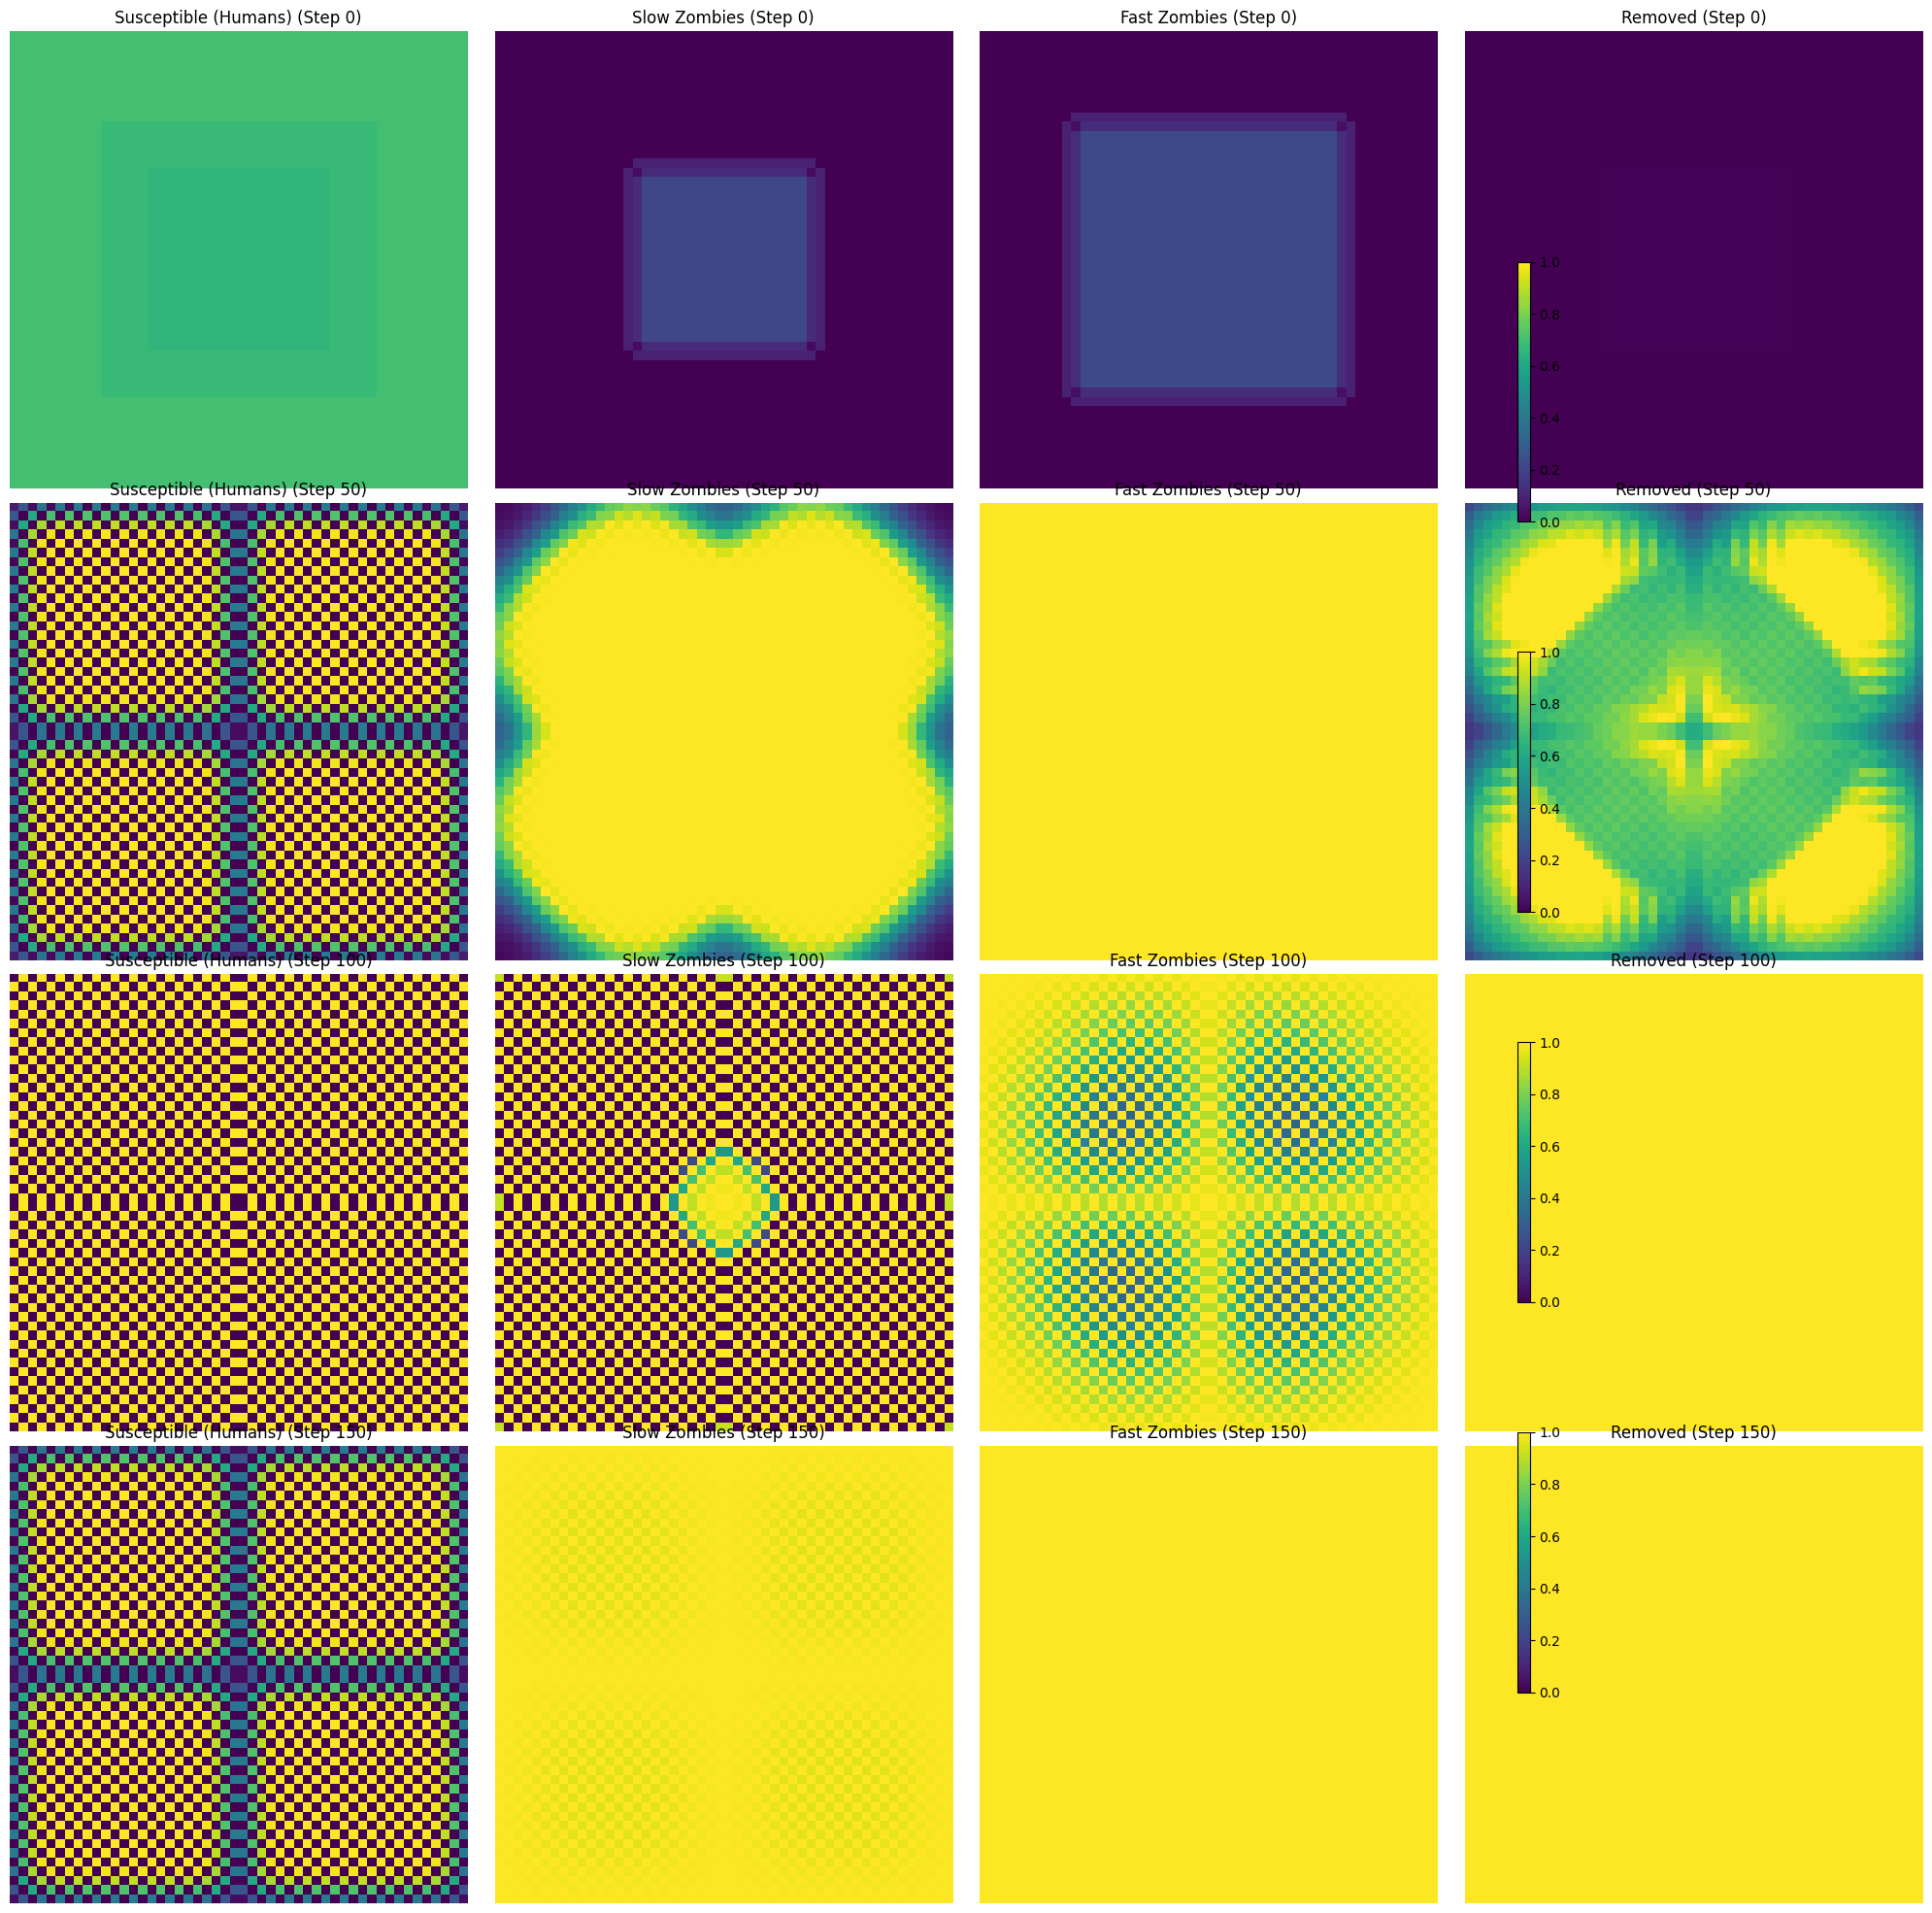

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 参数初始化
grid_size = 50
time_steps = 200
beta_slow_base = 0.1  # 慢僵尸的基础感染率
beta_fast_base = 0.2  # 快僵尸的基础感染率
diffusion_rate_human_base = 0.5  # 人类的基础扩散速率
diffusion_rate_zombie_base = 0.3  # 僵尸的基础扩散速率
alpha_slow = 0.02  # 慢僵尸移除率
alpha_fast = 0.04  # 快僵尸移除率

# 季节变化参数
A = 0.5  # 振幅，控制季节变化的强度
T = 100  # 周期，表示一个季节周期的时间步数

# 初始化网格
grid = np.zeros((grid_size, grid_size, 4))  # [S, Z_slow, Z_fast, R]
grid[:, :, 0] = 0.7  # 初始80%的易感者
grid[15:35, 15:35, 1] = 0.2  # 慢僵尸覆盖更大区域
grid[10:40, 10:40, 2] = 0.2  # 快僵尸覆盖更大区域

# 动态模拟函数（包含季节变化）
def simulate_spatial_model_with_seasonality(grid, time_steps, A, T):
    results = []
    for t in range(time_steps):
        # 计算当前时间步的季节性参数
        beta_slow = beta_slow_base * (1 + A * np.sin(2 * np.pi * t / T))
        beta_fast = beta_fast_base * (1 + A * np.sin(2 * np.pi * t / T))
        diffusion_rate_human = diffusion_rate_human_base * (1 + A * np.cos(2 * np.pi * t / T))
        diffusion_rate_zombie = diffusion_rate_zombie_base * (1 + A * np.cos(2 * np.pi * t / T))

        S, Z_slow, Z_fast, R = grid[:, :, 0], grid[:, :, 1], grid[:, :, 2], grid[:, :, 3]

        # 慢僵尸动态
        infection_slow = beta_slow * S * Z_slow
        removal_slow = alpha_slow * S * Z_slow
        diffusion_slow = diffusion_rate_zombie * (
            np.roll(Z_slow, 1, axis=0) + np.roll(Z_slow, -1, axis=0) +
            np.roll(Z_slow, 1, axis=1) + np.roll(Z_slow, -1, axis=1) - 4 * Z_slow
        )

        # 快僵尸动态
        infection_fast = beta_fast * S * Z_fast
        removal_fast = alpha_fast * S * Z_fast
        diffusion_fast = diffusion_rate_zombie * (
            np.roll(Z_fast, 1, axis=0) + np.roll(Z_fast, -1, axis=0) +
            np.roll(Z_fast, 1, axis=1) + np.roll(Z_fast, -1, axis=1) - 4 * Z_fast
        )

        # 人类动态
        diffusion_human = diffusion_rate_human * (
            np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
            np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S
        )

        # 动态更新
        dS = -infection_slow - infection_fast + diffusion_human
        dZ_slow = infection_slow - removal_slow + diffusion_slow
        dZ_fast = infection_fast - removal_fast + diffusion_fast
        dR = removal_slow + removal_fast

        # 更新网格
        grid[:, :, 0] += dS
        grid[:, :, 1] += dZ_slow
        grid[:, :, 2] += dZ_fast
        grid[:, :, 3] += dR

        # 确保数值范围有效
        grid = np.clip(grid, 0, 1)
        results.append(grid.copy())

        # 打印动态更新总数（可选）
        if t % 20 == 0:
            print(f"Step {t}: S={S.sum()}, Z_slow={Z_slow.sum()}, Z_fast={Z_fast.sum()}, R={R.sum()}")

    return results

# 静态绘图函数
def plot_static_frames(results, time_steps_to_plot):
    fig, axes = plt.subplots(len(time_steps_to_plot), 4, figsize=(20, 5 * len(time_steps_to_plot)))
    titles = ["Susceptible (Humans)", "Slow Zombies", "Fast Zombies", "Removed"]

    for i, step in enumerate(time_steps_to_plot):
        data = results[step]
        for j in range(4):
            ax = axes[i, j] if len(time_steps_to_plot) > 1 else axes[j]
            im = ax.imshow(data[:, :, j], cmap="viridis", origin="lower", vmin=0, vmax=1)
            ax.set_title(f"{titles[j]} (Step {step})")
            ax.axis("off")
        fig.colorbar(im, ax=axes[i, :].ravel().tolist(), shrink=0.8)  # 添加颜色条
    
    plt.tight_layout()
    plt.show()

# 模拟运行
results = simulate_spatial_model_with_seasonality(grid, time_steps, A, T)

# 绘制不同时刻的静态图
time_steps_to_plot = [0, 50, 100, 150]  # 选择要展示的时间步
plot_static_frames(results, time_steps_to_plot)


Step 0: S=1686.94176, Z_slow=88.93240320000001, Z_fast=221.51418880000003, R=12.611647999999999
Step 20: S=979.4571438135702, Z_slow=811.6955654971134, Z_fast=1262.651981117988, R=374.51397830807
Step 40: S=819.2027173729094, Z_slow=2128.990394997641, Z_fast=2580.997406086063, R=1331.2700873185017
Step 60: S=871.4714901960853, Z_slow=2412.146882015595, Z_fast=2611.4635544035646, R=2345.3877356496296
Step 80: S=1058.625075888709, Z_slow=2397.980896899112, Z_fast=2580.9768975218267, R=2555.367049525037
Step 100: S=1025.8596101445808, Z_slow=1332.500662062343, Z_fast=2496.640938841491, R=2544.428077971084
Step 120: S=1247.780602503793, Z_slow=1249.3485778500865, Z_fast=1250.0297447037037, R=2500.029738162586
Step 140: S=894.5992465031813, Z_slow=1774.0184819284964, Z_fast=2303.948958728387, R=2550.646496610858
Step 160: S=867.7625158848083, Z_slow=2555.229252723882, Z_fast=2611.397484875967, R=2566.045839745469
Step 180: S=1051.6579271337284, Z_slow=2540.1514703601924, Z_fast=2580.9602952

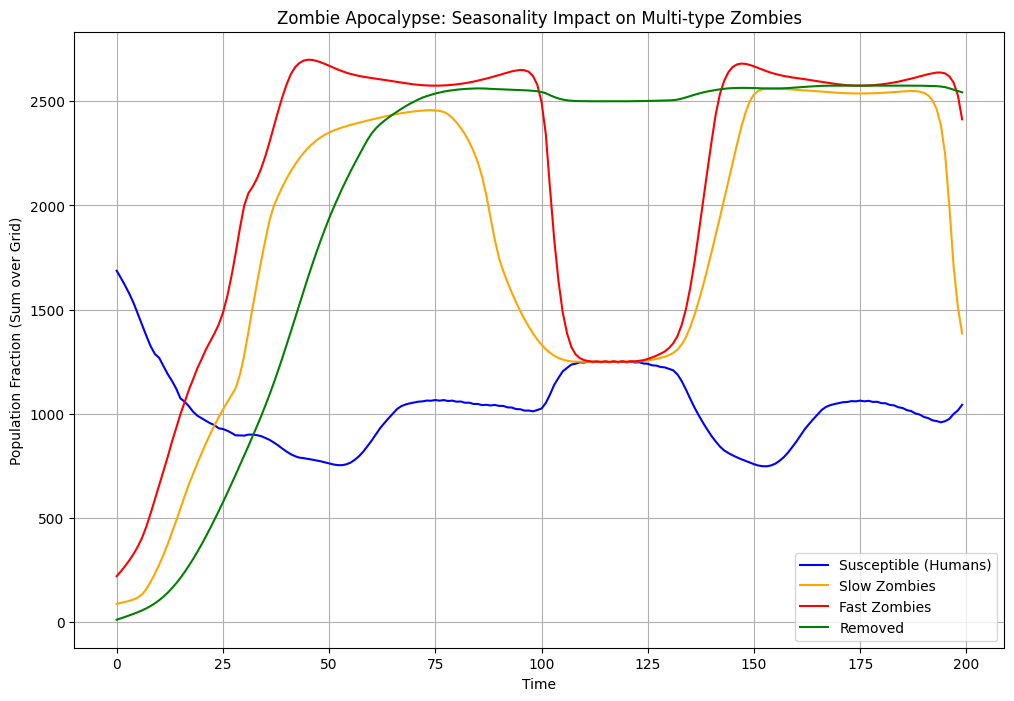

In [16]:
# 动态模拟函数（包含季节变化）
def simulate_spatial_model_with_seasonality(grid, time_steps, A, T):
    results = []
    global_s, global_z_slow, global_z_fast, global_r = [], [], [], []
    for t in range(time_steps):
        # 计算当前时间步的季节性参数
        beta_slow = beta_slow_base * (1 + A * np.sin(2 * np.pi * t / T))
        beta_fast = beta_fast_base * (1 + A * np.sin(2 * np.pi * t / T))
        diffusion_rate_human = diffusion_rate_human_base * (1 + A * np.cos(2 * np.pi * t / T))
        diffusion_rate_zombie = diffusion_rate_zombie_base * (1 + A * np.cos(2 * np.pi * t / T))

        S, Z_slow, Z_fast, R = grid[:, :, 0], grid[:, :, 1], grid[:, :, 2], grid[:, :, 3]

        # 慢僵尸动态
        infection_slow = beta_slow * S * Z_slow
        removal_slow = alpha_slow * S * Z_slow
        diffusion_slow = diffusion_rate_zombie * (
            np.roll(Z_slow, 1, axis=0) + np.roll(Z_slow, -1, axis=0) +
            np.roll(Z_slow, 1, axis=1) + np.roll(Z_slow, -1, axis=1) - 4 * Z_slow
        )

        # 快僵尸动态
        infection_fast = beta_fast * S * Z_fast
        removal_fast = alpha_fast * S * Z_fast
        diffusion_fast = diffusion_rate_zombie * (
            np.roll(Z_fast, 1, axis=0) + np.roll(Z_fast, -1, axis=0) +
            np.roll(Z_fast, 1, axis=1) + np.roll(Z_fast, -1, axis=1) - 4 * Z_fast
        )

        # 人类动态
        diffusion_human = diffusion_rate_human * (
            np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
            np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S
        )

        # 动态更新
        dS = -infection_slow - infection_fast + diffusion_human
        dZ_slow = infection_slow - removal_slow + diffusion_slow
        dZ_fast = infection_fast - removal_fast + diffusion_fast
        dR = removal_slow + removal_fast

        # 更新网格
        grid[:, :, 0] += dS
        grid[:, :, 1] += dZ_slow
        grid[:, :, 2] += dZ_fast
        grid[:, :, 3] += dR

        # 确保数值范围有效
        grid = np.clip(grid, 0, 1)
        results.append(grid.copy())

        # 记录全局总量
        global_s.append(S.sum())
        global_z_slow.append(Z_slow.sum())
        global_z_fast.append(Z_fast.sum())
        global_r.append(R.sum())

        # 打印动态更新总数（可选）
        if t % 20 == 0:
            print(f"Step {t}: S={S.sum()}, Z_slow={Z_slow.sum()}, Z_fast={Z_fast.sum()}, R={R.sum()}")

    return results, global_s, global_z_slow, global_z_fast, global_r

# 模拟运行
results, global_s, global_z_slow, global_z_fast, global_r = simulate_spatial_model_with_seasonality(grid, time_steps, A, T)

# 时间演化图
t = np.arange(time_steps)
plt.figure(figsize=(12, 8))
plt.plot(t, global_s, label="Susceptible (Humans)", color="blue")
plt.plot(t, global_z_slow, label="Slow Zombies", color="orange")
plt.plot(t, global_z_fast, label="Fast Zombies", color="red")
plt.plot(t, global_r, label="Removed", color="green")
plt.title("Zombie Apocalypse: Seasonality Impact on Multi-type Zombies")
plt.xlabel("Time")
plt.ylabel("Population Fraction (Sum over Grid)")
plt.legend()
plt.grid()
plt.show()


Step 0: S=1719.2, Z_slow=82.08000000000001, Z_fast=191.16, R=17.560000000000002
Step 20: S=996.4909312408225, Z_slow=731.9597345474444, Z_fast=1065.1950446004391, R=998.92919372097
Step 40: S=945.1422431123262, Z_slow=1607.5328398342597, Z_fast=1821.901247883777, R=2532.232945603487
Step 60: S=933.4783614081925, Z_slow=1733.6694091756954, Z_fast=2000.8874051793398, R=2696.525019645858
Step 80: S=1250.1212730180816, Z_slow=1160.1802886459225, Z_fast=1174.6729891424347, R=2598.3789353977227
Step 100: S=1251.8752792139562, Z_slow=1211.585058641378, Z_fast=1186.3420253251452, R=2599.9573740006463
Step 120: S=1128.7516422870697, Z_slow=945.5490818484477, Z_fast=829.3175917014576, R=2593.632063347904
Step 140: S=434.00378732175074, Z_slow=743.4759972547143, Z_fast=616.3815099412816, R=2562.1629677696205
Step 160: S=237.20996753235596, Z_slow=437.41822275347056, Z_fast=259.41869386475815, R=2529.0357021576515
Step 180: S=203.74474652125548, Z_slow=241.15911186391423, Z_fast=95.64609787462413,

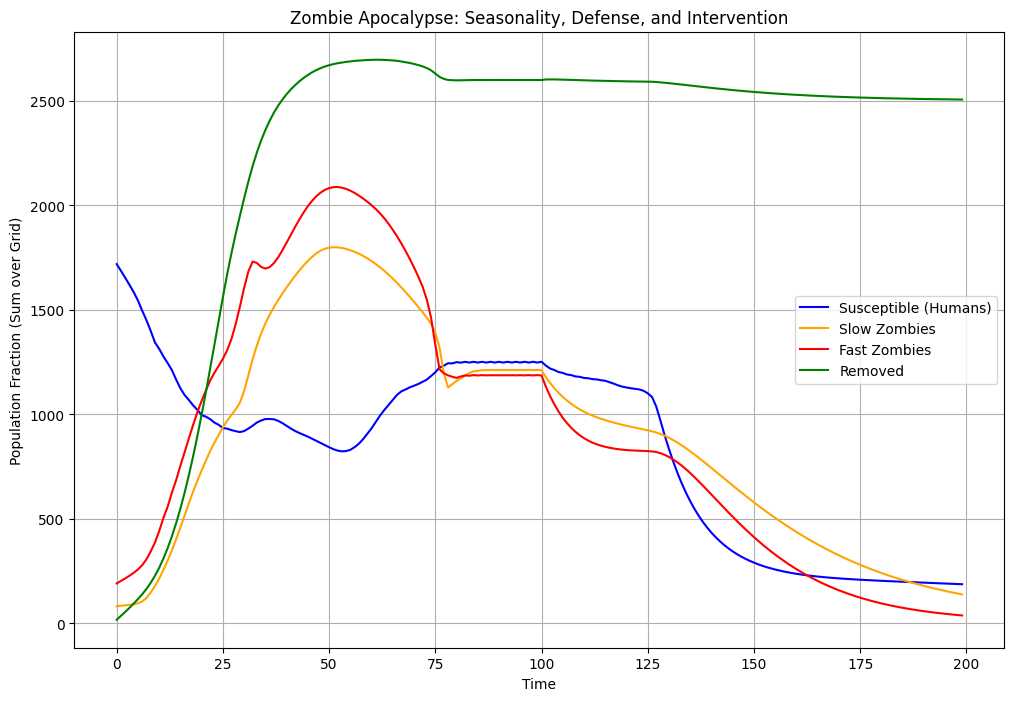

C:\Users\10267\AppData\Local\Temp\ipykernel_30212\1607619057.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


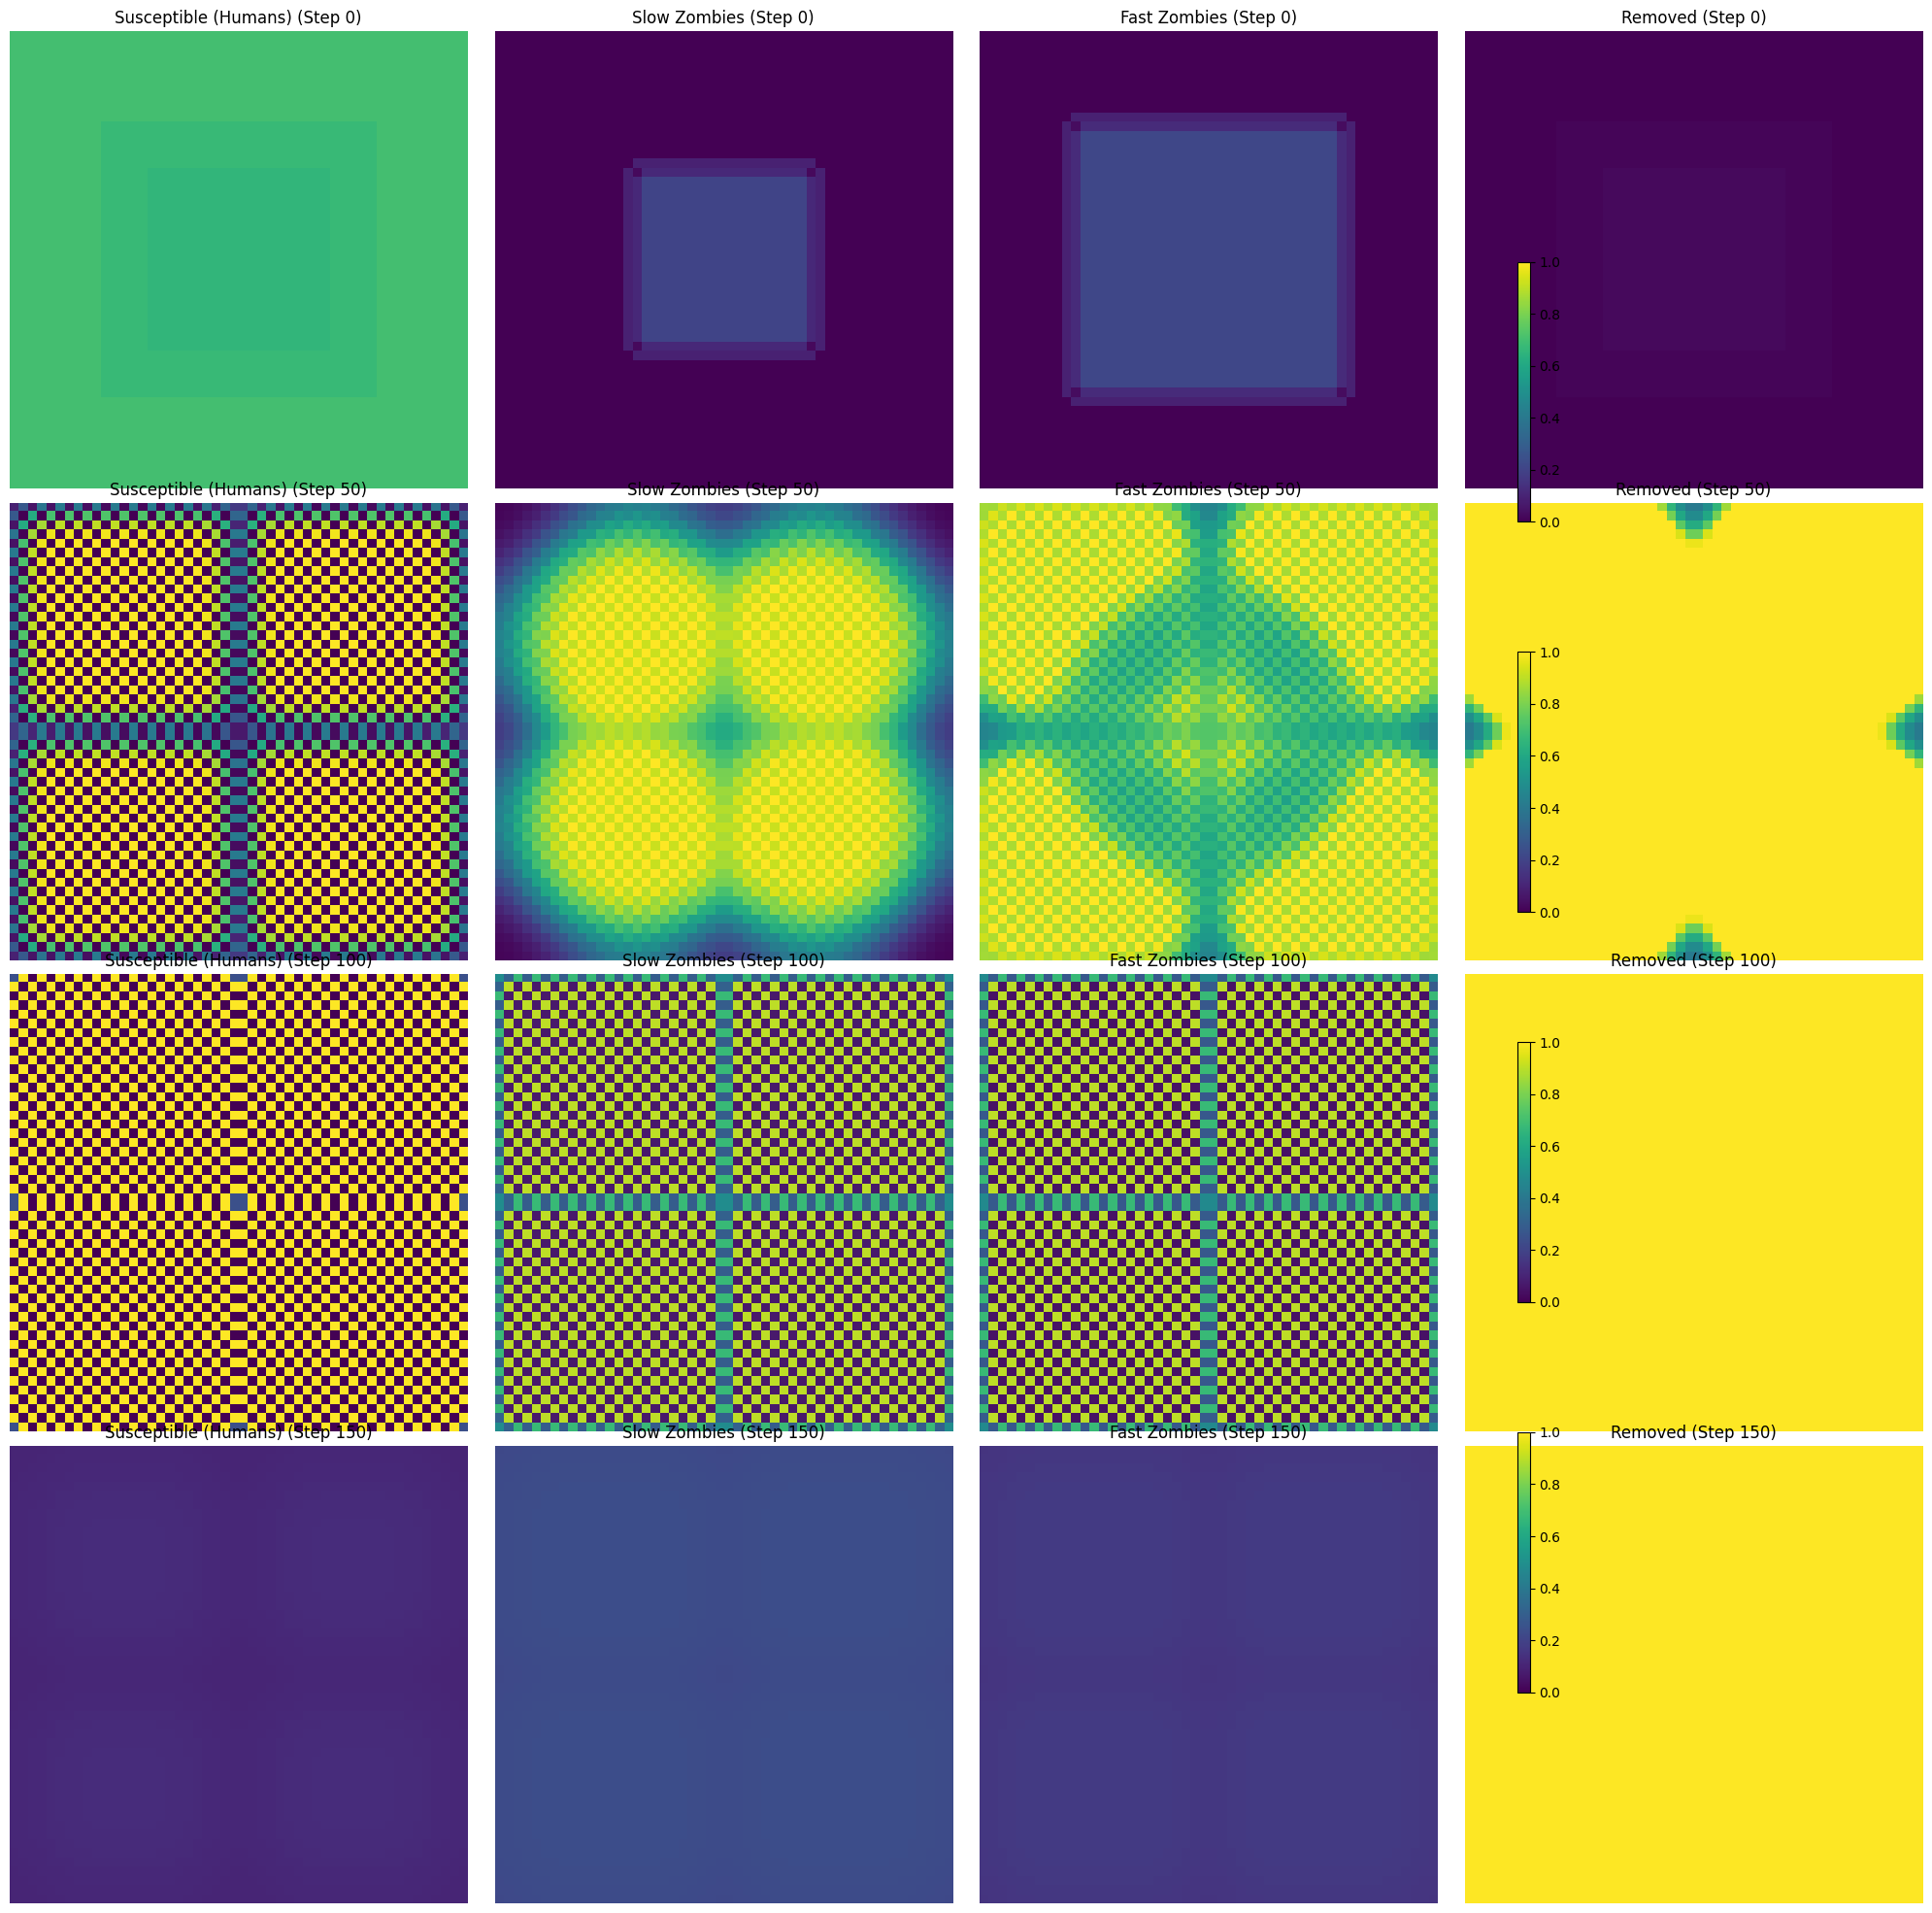

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 参数初始化
grid_size = 50
time_steps = 200
beta_slow_base = 0.1  # 慢僵尸的基础感染率
beta_fast_base = 0.2  # 快僵尸的基础感染率
diffusion_rate_human_base = 0.5  # 人类的基础扩散速率
diffusion_rate_zombie_base = 0.3  # 僵尸的基础扩散速率
alpha_slow = 0.02  # 慢僵尸移除率
alpha_fast = 0.04  # 快僵尸移除率
gamma_slow = 0.03  # 人类清除慢僵尸的效率
gamma_fast = 0.05  # 人类清除快僵尸的效率

# 干预参数
intervention_time = 100  # 在第100步实施干预
intervention_effect = 0.5  # 干预将感染率和扩散速率降低50%
A = 0.5  # 季节变化振幅
T = 100  # 季节周期

# 初始化网格
grid = np.zeros((grid_size, grid_size, 4))  # [S, Z_slow, Z_fast, R]
grid[:, :, 0] = 0.7  # 初始80%的易感者
grid[15:35, 15:35, 1] = 0.2  # 慢僵尸覆盖更大区域
grid[10:40, 10:40, 2] = 0.2  # 快僵尸覆盖更大区域

# 动态模拟函数（包含季节变化、防御和干预）
def simulate_with_intervention(grid, time_steps, A, T, intervention_time, intervention_effect):
    results = []
    global_s, global_z_slow, global_z_fast, global_r = [], [], [], []
    for t in range(time_steps):
        # 计算当前时间步的季节性参数
        beta_slow = beta_slow_base * (1 + A * np.sin(2 * np.pi * t / T))
        beta_fast = beta_fast_base * (1 + A * np.sin(2 * np.pi * t / T))
        diffusion_rate_human = diffusion_rate_human_base * (1 + A * np.cos(2 * np.pi * t / T))
        diffusion_rate_zombie = diffusion_rate_zombie_base * (1 + A * np.cos(2 * np.pi * t / T))

        # 干预措施生效
        if t >= intervention_time:
            beta_slow *= intervention_effect
            beta_fast *= intervention_effect
            diffusion_rate_human *= intervention_effect
            diffusion_rate_zombie *= intervention_effect

        S, Z_slow, Z_fast, R = grid[:, :, 0], grid[:, :, 1], grid[:, :, 2], grid[:, :, 3]

        # 慢僵尸动态
        infection_slow = beta_slow * S * Z_slow
        removal_slow = alpha_slow * S * Z_slow
        clearance_slow = gamma_slow * Z_slow
        diffusion_slow = diffusion_rate_zombie * (
            np.roll(Z_slow, 1, axis=0) + np.roll(Z_slow, -1, axis=0) +
            np.roll(Z_slow, 1, axis=1) + np.roll(Z_slow, -1, axis=1) - 4 * Z_slow
        )

        # 快僵尸动态
        infection_fast = beta_fast * S * Z_fast
        removal_fast = alpha_fast * S * Z_fast
        clearance_fast = gamma_fast * Z_fast
        diffusion_fast = diffusion_rate_zombie * (
            np.roll(Z_fast, 1, axis=0) + np.roll(Z_fast, -1, axis=0) +
            np.roll(Z_fast, 1, axis=1) + np.roll(Z_fast, -1, axis=1) - 4 * Z_fast
        )

        # 人类动态
        diffusion_human = diffusion_rate_human * (
            np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
            np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S
        )

        # 动态更新
        dS = -infection_slow - infection_fast + diffusion_human
        dZ_slow = infection_slow - removal_slow - clearance_slow + diffusion_slow
        dZ_fast = infection_fast - removal_fast - clearance_fast + diffusion_fast
        dR = removal_slow + removal_fast + clearance_slow + clearance_fast

        # 更新网格
        grid[:, :, 0] += dS
        grid[:, :, 1] += dZ_slow
        grid[:, :, 2] += dZ_fast
        grid[:, :, 3] += dR

        # 确保数值范围有效
        grid = np.clip(grid, 0, 1)
        results.append(grid.copy())

        # 记录全局总量
        global_s.append(S.sum())
        global_z_slow.append(Z_slow.sum())
        global_z_fast.append(Z_fast.sum())
        global_r.append(R.sum())

        # 打印动态更新总数（可选）
        if t % 20 == 0:
            print(f"Step {t}: S={S.sum()}, Z_slow={Z_slow.sum()}, Z_fast={Z_fast.sum()}, R={R.sum()}")

    return results, global_s, global_z_slow, global_z_fast, global_r

# 模拟运行
results, global_s, global_z_slow, global_z_fast, global_r = simulate_with_intervention(
    grid, time_steps, A, T, intervention_time, intervention_effect
)

# 时间演化图
t = np.arange(time_steps)
plt.figure(figsize=(12, 8))
plt.plot(t, global_s, label="Susceptible (Humans)", color="blue")
plt.plot(t, global_z_slow, label="Slow Zombies", color="orange")
plt.plot(t, global_z_fast, label="Fast Zombies", color="red")
plt.plot(t, global_r, label="Removed", color="green")
plt.title("Zombie Apocalypse: Seasonality, Defense, and Intervention")
plt.xlabel("Time")
plt.ylabel("Population Fraction (Sum over Grid)")
plt.legend()
plt.grid()
plt.show()

# 静态网格图函数
def plot_static_frames(results, time_steps_to_plot):
    fig, axes = plt.subplots(len(time_steps_to_plot), 4, figsize=(20, 5 * len(time_steps_to_plot)))
    titles = ["Susceptible (Humans)", "Slow Zombies", "Fast Zombies", "Removed"]

    for i, step in enumerate(time_steps_to_plot):
        data = results[step]
        for j in range(4):
            ax = axes[i, j] if len(time_steps_to_plot) > 1 else axes[j]
            im = ax.imshow(data[:, :, j], cmap="viridis", origin="lower", vmin=0, vmax=1)
            ax.set_title(f"{titles[j]} (Step {step})")
            ax.axis("off")
        fig.colorbar(im, ax=axes[i, :].ravel().tolist(), shrink=0.8)  # 添加颜色条
    
    plt.tight_layout()
    plt.show()

# 绘制静态网格图
time_steps_to_plot = [0, 50, 100, 150]  # 选择要展示的时间步
plot_static_frames(results, time_steps_to_plot)


Step 0: S=1719.2, Z_slow=81.68, Z_fast=189.36, R=19.76
Step 20: S=998.2624309229304, Z_slow=724.2459674103914, Z_fast=1031.7061237064881, R=1144.2444745654848
Step 40: S=983.0960791462809, Z_slow=1433.9937729669932, Z_fast=1573.851706819803, R=2581.9972395380228
Step 60: S=1003.5463032640953, Z_slow=1217.6542097350666, Z_fast=1286.041681498432, R=2681.0241579588755
Step 80: S=1251.4724769938557, Z_slow=1035.1391643246973, Z_fast=1064.297948702138, R=2643.780548192455
Step 100: S=1251.9404733715128, Z_slow=1186.3192246456174, Z_fast=1142.1426070616924, R=2668.559912555856
Step 120: S=1185.687742012151, Z_slow=584.4851910458465, Z_fast=329.2165832720668, R=2574.4916566780335
Step 140: S=854.8158587359368, Z_slow=300.287611876559, Z_fast=118.18543297294724, R=2533.4444478103014
Step 160: S=745.4167629298761, Z_slow=111.63946738799002, Z_fast=22.76921528821399, R=2510.4756467459692
Step 180: S=730.5294541896881, Z_slow=33.5425523711, Z_fast=2.882248647322178, R=2502.795807312512


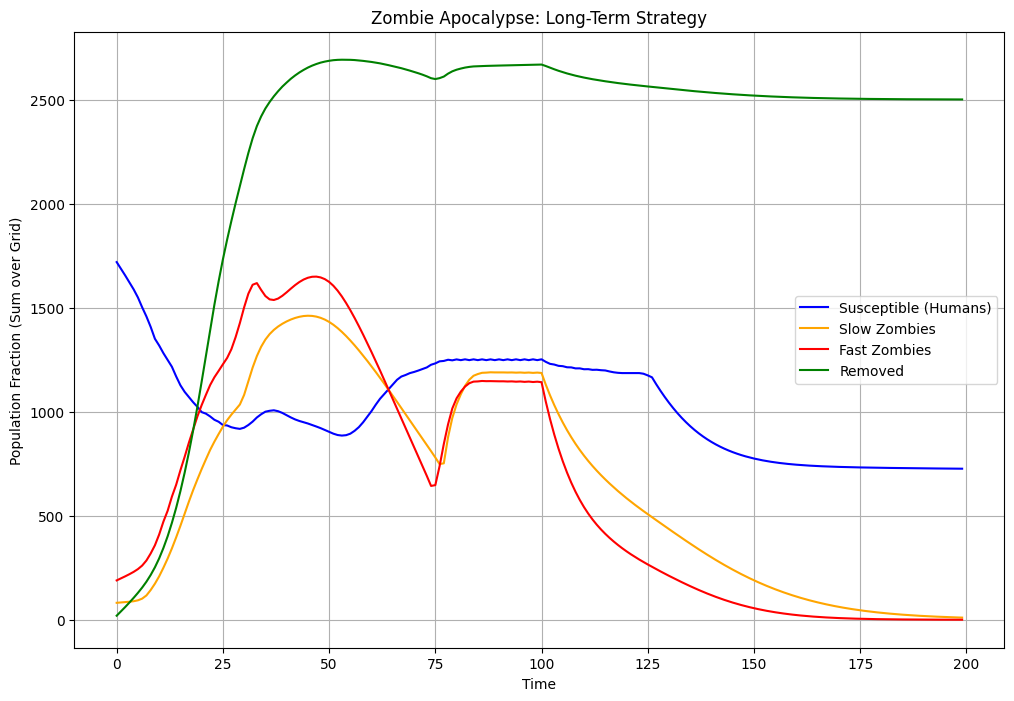

C:\Users\10267\AppData\Local\Temp\ipykernel_30212\3058010162.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


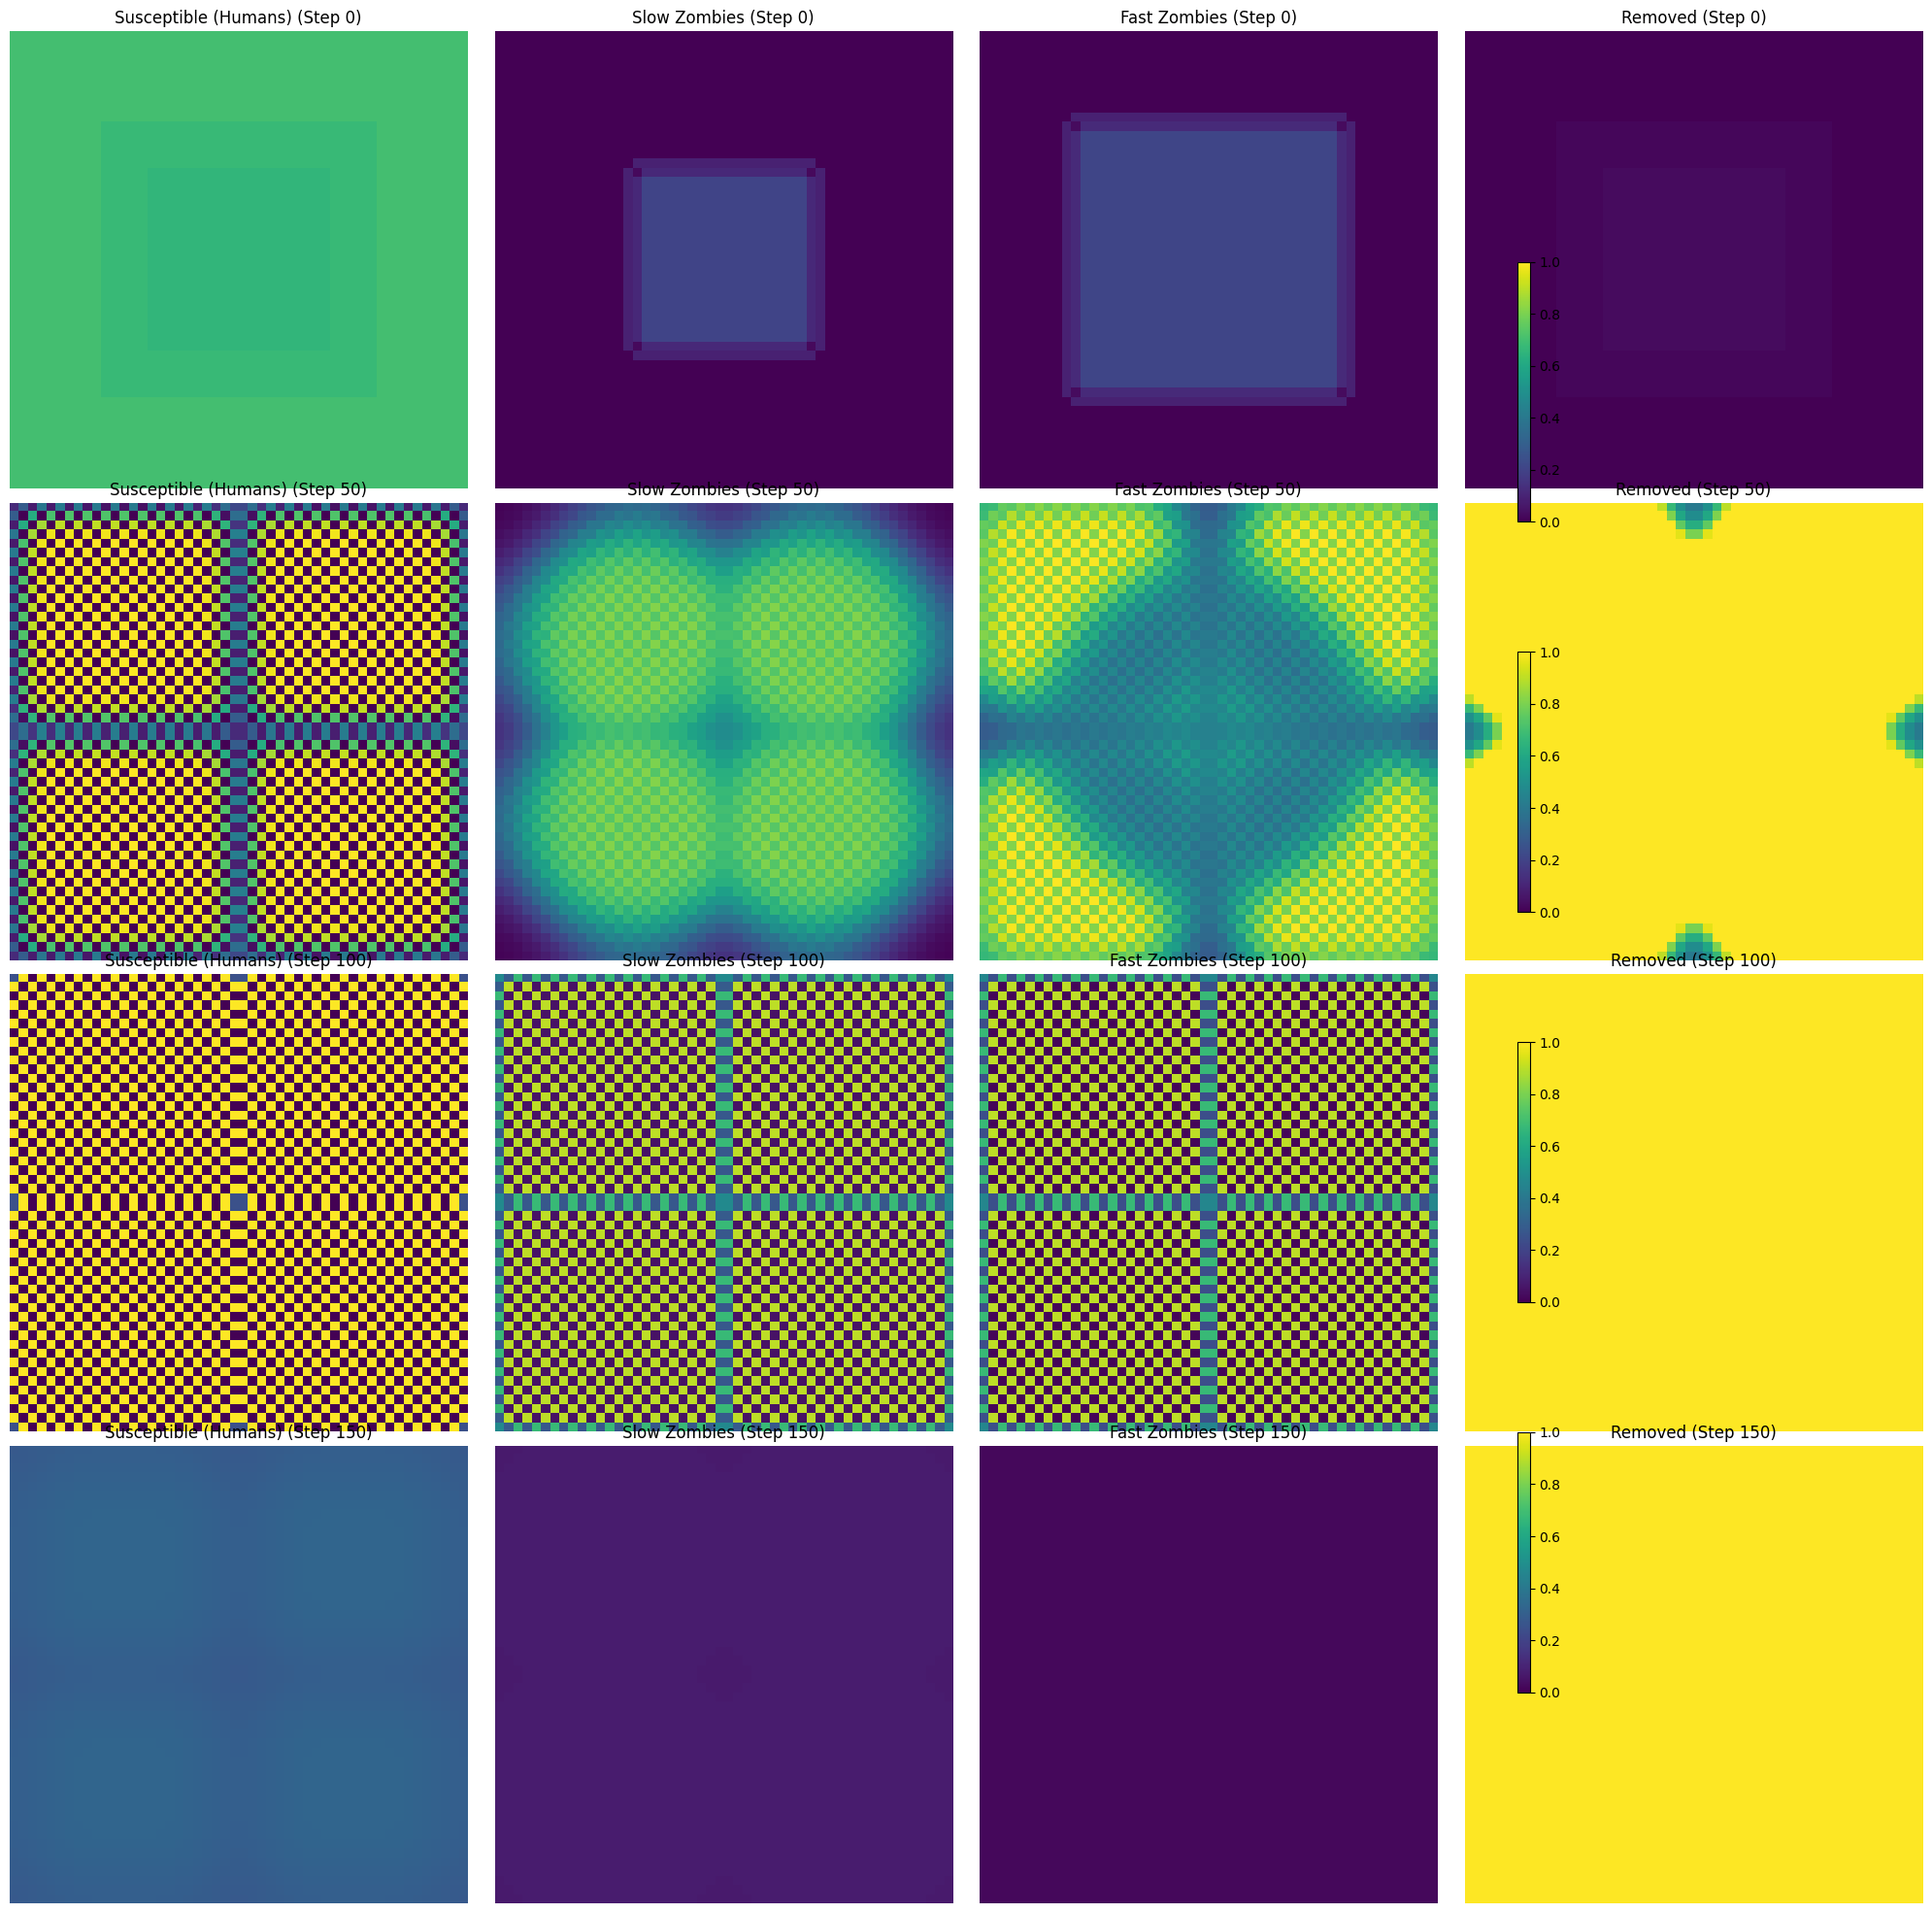

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 参数初始化
grid_size = 50
time_steps = 200
beta_slow_base = 0.1  # 慢僵尸的基础感染率
beta_fast_base = 0.2  # 快僵尸的基础感染率
diffusion_rate_human_base = 0.5  # 人类的基础扩散速率
diffusion_rate_zombie_base = 0.3  # 僵尸的基础扩散速率
alpha_slow = 0.02  # 慢僵尸移除率
alpha_fast = 0.04  # 快僵尸移除率
gamma_slow_base = 0.03  # 基础慢僵尸清除效率
gamma_fast_base = 0.05  # 基础快僵尸清除效率

# 僵尸自衰退率
delta_slow = 0.005  # 慢僵尸自衰退率
delta_fast = 0.01   # 快僵尸自衰退率

# 干预参数
intervention_time = 100  # 在第100步实施干预
intervention_effect = 0.5  # 干预将感染率和扩散速率降低50%
A = 0.5  # 季节变化振幅
T = 100  # 季节周期

# 初始化网格
grid = np.zeros((grid_size, grid_size, 4))  # [S, Z_slow, Z_fast, R]
grid[:, :, 0] = 0.7  # 初始80%的易感者
grid[15:35, 15:35, 1] = 0.2  # 慢僵尸覆盖更大区域
grid[10:40, 10:40, 2] = 0.2  # 快僵尸覆盖更大区域

# 动态模拟函数（包含长期策略）
def simulate_with_long_term_strategy(grid, time_steps, A, T, intervention_time, intervention_effect):
    results = []
    global_s, global_z_slow, global_z_fast, global_r = [], [], [], []
    for t in range(time_steps):
        # 计算当前时间步的季节性参数
        beta_slow = beta_slow_base * (1 + A * np.sin(2 * np.pi * t / T))
        beta_fast = beta_fast_base * (1 + A * np.sin(2 * np.pi * t / T))
        diffusion_rate_human = diffusion_rate_human_base * (1 + A * np.cos(2 * np.pi * t / T))
        diffusion_rate_zombie = diffusion_rate_zombie_base * (1 + A * np.cos(2 * np.pi * t / T))

        # 干预措施生效
        if t >= intervention_time:
            beta_slow *= intervention_effect
            beta_fast *= intervention_effect
            diffusion_rate_human *= intervention_effect
            diffusion_rate_zombie *= intervention_effect

        # 动态增加清除效率
        gamma_slow = gamma_slow_base * (1 + t / time_steps)
        gamma_fast = gamma_fast_base * (1 + t / time_steps)

        S, Z_slow, Z_fast, R = grid[:, :, 0], grid[:, :, 1], grid[:, :, 2], grid[:, :, 3]

        # 慢僵尸动态
        infection_slow = beta_slow * S * Z_slow
        removal_slow = alpha_slow * S * Z_slow
        clearance_slow = gamma_slow * Z_slow
        decay_slow = delta_slow * Z_slow
        diffusion_slow = diffusion_rate_zombie * (
            np.roll(Z_slow, 1, axis=0) + np.roll(Z_slow, -1, axis=0) +
            np.roll(Z_slow, 1, axis=1) + np.roll(Z_slow, -1, axis=1) - 4 * Z_slow
        )

        # 快僵尸动态
        infection_fast = beta_fast * S * Z_fast
        removal_fast = alpha_fast * S * Z_fast
        clearance_fast = gamma_fast * Z_fast
        decay_fast = delta_fast * Z_fast
        diffusion_fast = diffusion_rate_zombie * (
            np.roll(Z_fast, 1, axis=0) + np.roll(Z_fast, -1, axis=0) +
            np.roll(Z_fast, 1, axis=1) + np.roll(Z_fast, -1, axis=1) - 4 * Z_fast
        )

        # 人类动态
        diffusion_human = diffusion_rate_human * (
            np.roll(S, 1, axis=0) + np.roll(S, -1, axis=0) +
            np.roll(S, 1, axis=1) + np.roll(S, -1, axis=1) - 4 * S
        )

        # 动态更新
        dS = -infection_slow - infection_fast + diffusion_human
        dZ_slow = infection_slow - removal_slow - clearance_slow - decay_slow + diffusion_slow
        dZ_fast = infection_fast - removal_fast - clearance_fast - decay_fast + diffusion_fast
        dR = removal_slow + removal_fast + clearance_slow + clearance_fast + decay_slow + decay_fast

        # 更新网格
        grid[:, :, 0] += dS
        grid[:, :, 1] += dZ_slow
        grid[:, :, 2] += dZ_fast
        grid[:, :, 3] += dR

        # 确保数值范围有效
        grid = np.clip(grid, 0, 1)
        results.append(grid.copy())

        # 记录全局总量
        global_s.append(S.sum())
        global_z_slow.append(Z_slow.sum())
        global_z_fast.append(Z_fast.sum())
        global_r.append(R.sum())

        # 打印动态更新总数（可选）
        if t % 20 == 0:
            print(f"Step {t}: S={S.sum()}, Z_slow={Z_slow.sum()}, Z_fast={Z_fast.sum()}, R={R.sum()}")

    return results, global_s, global_z_slow, global_z_fast, global_r

# 模拟运行
results, global_s, global_z_slow, global_z_fast, global_r = simulate_with_long_term_strategy(
    grid, time_steps, A, T, intervention_time, intervention_effect
)

# 时间演化图
t = np.arange(time_steps)
plt.figure(figsize=(12, 8))
plt.plot(t, global_s, label="Susceptible (Humans)", color="blue")
plt.plot(t, global_z_slow, label="Slow Zombies", color="orange")
plt.plot(t, global_z_fast, label="Fast Zombies", color="red")
plt.plot(t, global_r, label="Removed", color="green")
plt.title("Zombie Apocalypse: Long-Term Strategy")
plt.xlabel("Time")
plt.ylabel("Population Fraction (Sum over Grid)")
plt.legend()
plt.grid()
plt.show()

# 静态网格图函数
def plot_static_frames(results, time_steps_to_plot):
    fig, axes = plt.subplots(len(time_steps_to_plot), 4, figsize=(20, 5 * len(time_steps_to_plot)))
    titles = ["Susceptible (Humans)", "Slow Zombies", "Fast Zombies", "Removed"]

    for i, step in enumerate(time_steps_to_plot):
        data = results[step]
        for j in range(4):
            ax = axes[i, j] if len(time_steps_to_plot) > 1 else axes[j]
            im = ax.imshow(data[:, :, j], cmap="viridis", origin="lower", vmin=0, vmax=1)
            ax.set_title(f"{titles[j]} (Step {step})")
            ax.axis("off")
        fig.colorbar(im, ax=axes[i, :].ravel().tolist(), shrink=0.8)  # 添加颜色条
    
    plt.tight_layout()
    plt.show()

# 绘制静态网格图
time_steps_to_plot = [0, 50, 100, 150]  # 选择要展示的时间步
plot_static_frames(results, time_steps_to_plot)
